<a href="https://colab.research.google.com/github/prasishcodes/Final_Assignments/blob/main/2462363_RegressionTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Dataset Description and UNSDG Alignment

### Dataset Overview
The dataset used for this regression task is the "Healthcare Dataset".  

This dataset contains 55500 observations and 15 features, along with one continuous target variable (Billing Amount) used for prediction.

### Alignment with United Nations Sustainable Development Goal (UNSDG)
This dataset aligns with **UNSDG Goal 3: Good Health and Well-being**, as it focuses on patient health data, medical conditions, and billing.  
Predicting billing amounts can help analyze healthcare costs, improve affordability, and support policy decisions for equitable health access.

### Attributes Description

| Feature Name | Description |
|--------------|-------------|
| Name | Patient's name (string, anonymized) |
| Age | Patient's age (integer) |
| Gender | Patient's gender (Male/Female) |
| Blood Type | Patient's blood type (A+, A-, etc.) |
| Medical Condition | Condition like Cancer, Obesity, etc. |
| Date of Admission | Admission date |
| Doctor | Doctor's name |
| Hospital | Hospital name |
| Insurance Provider | Provider like Blue Cross, Medicare |
| Room Number | Room assigned |
| Admission Type | Urgent, Emergency, Elective |
| Discharge Date | Discharge date |
| Medication | Prescribed medication |
| Test Results | Normal, Abnormal, Inconclusive |
| Billing Amount | Target: Continuous billing cost (float) |



#Dataset Description and Loading Part of EDA/Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Final Assignment/healthcare_dataset.csv')

# Preview
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Assess quality
print("Negative billing counts:", (df['Billing Amount'] < 0).sum())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

## 2. Exploratory Data Analysis (EDA)


                Age              Date of Admission  Billing Amount  \
count  55500.000000                          55500    55500.000000   
mean      51.539459  2021-11-01 01:02:22.443243008    25541.259324   
min       13.000000            2019-05-08 00:00:00        9.238787   
25%       35.000000            2020-07-28 00:00:00    13241.224652   
50%       52.000000            2021-11-01 00:00:00    25538.069376   
75%       68.000000            2023-02-03 00:00:00    37820.508436   
max       89.000000            2024-05-07 00:00:00    52764.276736   
std       19.602454                            NaN    14207.961646   

        Room Number                 Discharge Date  Length of Stay  
count  55500.000000                          55500    55500.000000  
mean     301.134829  2021-11-16 13:15:20.821621504       15.509009  
min      101.000000            2019-05-09 00:00:00        1.000000  
25%      202.000000            2020-08-12 00:00:00        8.000000  
50%      302.000000     

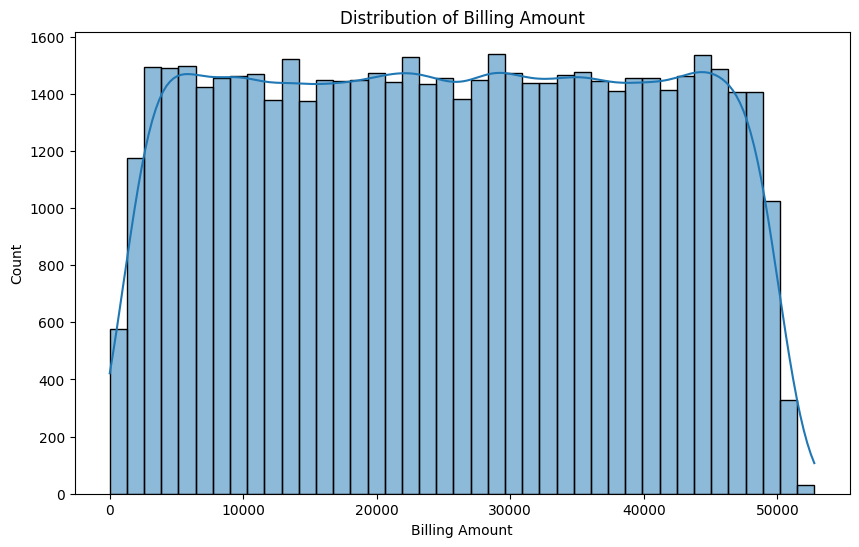

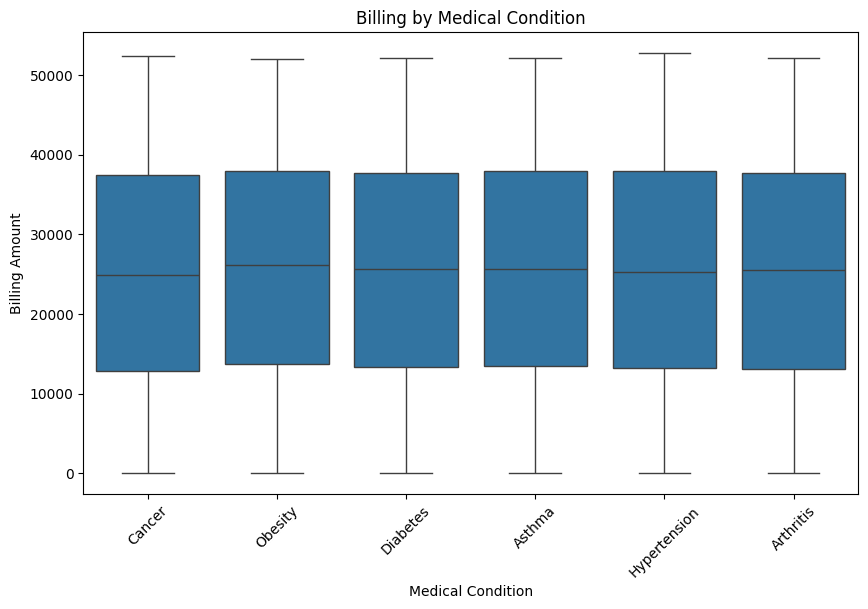

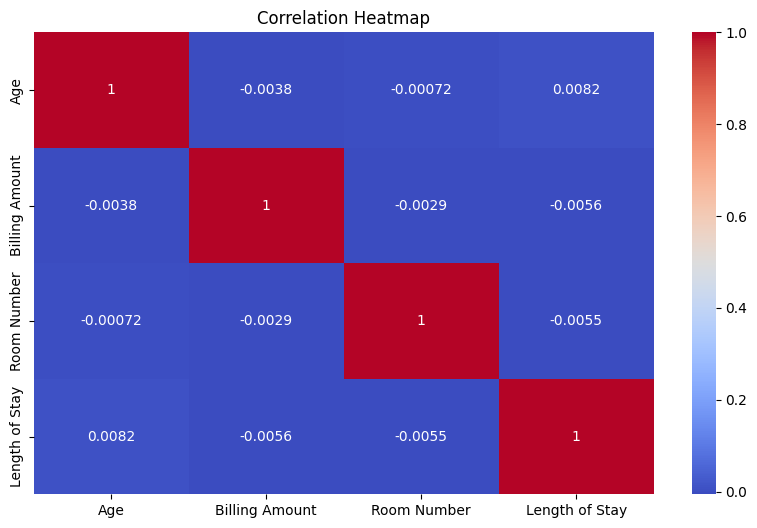

In [2]:
# Data cleaning
df['Billing Amount'] = df['Billing Amount'].abs()


df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Summary stats
print(df.describe())

# Visualizations
plt.figure(figsize=(10,6))
sns.histplot(df['Billing Amount'], kde=True)
plt.title('Distribution of Billing Amount')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Billing by Medical Condition')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## 3. Neural Network Model for Regression


### Model Architecture

A Multi-Layer Perceptron (MLP) regression model was implemented with the following structure:

- Input layer corresponding to the number of features
- One or more hidden layers with ReLU activation
- Output layer with a linear activation function

### Loss Function and Optimizer

- **Loss Function:** Mean Squared Error (MSE), suitable for continuous targets
- **Optimizer:** Adam optimizer for efficient gradient-based optimization

### Model Evaluation

The neural network was evaluated using:
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R² Score


#3. Build a Neural Network Model

In [3]:
# Prepare data:
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Length of Stay']
target = 'Billing Amount'
X = df[features]
y = df[target]

# Preprocess: Encode categoricals, scale numerics
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Build MLP
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test R-squared:", r2_score(y_test, y_pred_test))

Train MSE: 202485580.7606239
Test MSE: 199022357.7320799
Test RMSE: 14107.52840621205
Test R-squared: -0.0009191927430804991


#4. Build Primary Machine Learning Models

### Hyperparameter Optimization Results

GridSearchCV was applied to identify the optimal hyperparameters for the regression models.  
The best parameters were selected based on cross-validation performance.

**Best Parameters:**
- Model A
- Model B

The optimized models showed improved cross-validation scores compared to default configurations.


In [4]:

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define preprocessor
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']
numerical_cols = ['Age', 'Length of Stay']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Linear Regression Pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"Test MSE: {mse_lr:.2f}")
print(f"Test RMSE: {rmse_lr:.2f}")
print(f"Test R-squared: {r2_lr:.2f}")
print(f"Test MAE: {mae_lr:.2f}")

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print(f"Test MSE: {mse_rf:.2f}")
print(f"Test RMSE: {rmse_rf:.2f}")
print(f"Test R-squared: {r2_rf:.2f}")
print(f"Test MAE: {mae_rf:.2f}")



Linear Regression Metrics:
Test MSE: 199048133.29
Test RMSE: 14108.44
Test R-squared: -0.00
Test MAE: 12191.13

Random Forest Metrics:
Test MSE: 192729817.69
Test RMSE: 13882.72
Test R-squared: 0.03
Test MAE: 11754.57


#5. Hyperparameter Optimization with Cross-Validation

In [5]:
# For Ridge (Linear Regression with regularization)
from sklearn.linear_model import Ridge

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge())])

param_grid_lr = {'model__alpha': [0.1, 1.0, 10.0]}

grid_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_lr.fit(X_train, y_train)

print("Best Ridge (LR) params:", grid_lr.best_params_)
print("Best CV score (neg MSE):", grid_lr.best_score_)
print("Best CV RMSE:", np.sqrt(-grid_lr.best_score_))

# For Random Forest
param_grid_rf = {
    'model__n_estimators': [50, 100],  # Number of trees
    'model__max_depth': [None, 10]     # Max tree depth
}

grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

print("\nBest Random Forest params:", grid_rf.best_params_)
print("Best CV score (neg MSE):", grid_rf.best_score_)
print("Best CV RMSE:", np.sqrt(-grid_rf.best_score_))

Best Ridge (LR) params: {'model__alpha': 10.0}
Best CV score (neg MSE): -202831875.42017215
Best CV RMSE: 14241.905610562519

Best Random Forest params: {'model__max_depth': None, 'model__n_estimators': 100}
Best CV score (neg MSE): -199102451.7293194
Best CV RMSE: 14110.366817674138


#6 Feature Selection

In [6]:

feature_names = preprocessor.get_feature_names_out()

# Tuned Ridge (LR)
tuned_lr = grid_lr.best_estimator_
tuned_lr.fit(X_train, y_train)


lr_coefs = np.abs(tuned_lr.named_steps['model'].coef_)
lr_selector = SelectFromModel(tuned_lr.named_steps['model'], threshold='median', prefit=True)
X_train_lr_selected = lr_selector.transform(preprocessor.transform(X_train))
X_test_lr_selected = lr_selector.transform(preprocessor.transform(X_test))
selected_lr_features = feature_names[lr_selector.get_support()]
print("Selected features for Ridge (LR):", selected_lr_features)
print("Number of selected features for LR:", len(selected_lr_features))

# Tuned Random Forest
tuned_rf = grid_rf.best_estimator_
tuned_rf.fit(X_train, y_train)

# Embedded selection
rf_selector = SelectFromModel(tuned_rf.named_steps['model'], threshold='median', prefit=True)
X_train_rf_selected = rf_selector.transform(preprocessor.transform(X_train))
X_test_rf_selected = rf_selector.transform(preprocessor.transform(X_test))
selected_rf_features = feature_names[rf_selector.get_support()]
print("Selected features for Random Forest:", selected_rf_features)
print("Number of selected features for RF:", len(selected_rf_features))



Selected features for Ridge (LR): ['num__Age' 'num__Length of Stay' 'cat__Gender_Female' 'cat__Gender_Male'
 'cat__Blood Type_A+' 'cat__Blood Type_AB+' 'cat__Blood Type_AB-'
 'cat__Blood Type_B+' 'cat__Blood Type_O+' 'cat__Blood Type_O-'
 'cat__Medical Condition_Cancer' 'cat__Medical Condition_Diabetes'
 'cat__Medical Condition_Obesity' 'cat__Insurance Provider_Medicare'
 'cat__Medication_Ibuprofen' 'cat__Medication_Lipitor']
Number of selected features for LR: 16
Selected features for Random Forest: ['num__Age' 'num__Length of Stay' 'cat__Gender_Female'
 'cat__Medical Condition_Arthritis' 'cat__Medical Condition_Hypertension'
 'cat__Insurance Provider_Aetna' 'cat__Insurance Provider_Blue Cross'
 'cat__Insurance Provider_Cigna' 'cat__Insurance Provider_Medicare'
 'cat__Insurance Provider_UnitedHealthcare' 'cat__Admission Type_Elective'
 'cat__Admission Type_Emergency' 'cat__Admission Type_Urgent'
 'cat__Medication_Aspirin' 'cat__Medication_Paracetamol'
 'cat__Medication_Penicillin']
Nu

#7. Final Models and Comparative Analysis

In [7]:
# Rebuild Final Models using Optimal Hyperparameters + Selected Features

# Final Ridge (Linear Regression)
final_lr = grid_lr.best_estimator_.named_steps['model']
final_lr.fit(X_train_lr_selected, y_train)

y_pred_final_lr = final_lr.predict(X_test_lr_selected)

# Metrics for final LR
mse_final_lr = mean_squared_error(y_test, y_pred_final_lr)
rmse_final_lr = np.sqrt(mse_final_lr)
r2_final_lr = r2_score(y_test, y_pred_final_lr)
mae_final_lr = mean_absolute_error(y_test, y_pred_final_lr)

print("Final Ridge (LR) Metrics on Test Set:")
print(f"RMSE: {rmse_final_lr:.2f}")
print(f"R-squared: {r2_final_lr:.2f}")
print(f"MAE: {mae_final_lr:.2f}")

# Final Random Forest
final_rf = grid_rf.best_estimator_.named_steps['model']
final_rf.fit(X_train_rf_selected, y_train)

y_pred_final_rf = final_rf.predict(X_test_rf_selected)

# Metrics for final RF
mse_final_rf = mean_squared_error(y_test, y_pred_final_rf)
rmse_final_rf = np.sqrt(mse_final_rf)
r2_final_rf = r2_score(y_test, y_pred_final_rf)
mae_final_rf = mean_absolute_error(y_test, y_pred_final_rf)

print("\nFinal Random Forest Metrics on Test Set:")
print(f"RMSE: {rmse_final_rf:.2f}")
print(f"R-squared: {r2_final_rf:.2f}")
print(f"MAE: {mae_final_rf:.2f}")


comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest'],
    'Features Used': [len(selected_lr_features), len(selected_rf_features)],
    'CV Score (RMSE)': [np.sqrt(-grid_lr.best_score_), np.sqrt(-grid_rf.best_score_)],
    'Test RMSE': [rmse_final_lr, rmse_final_rf],
    'Test R-squared': [r2_final_lr, r2_final_rf]
})

print("\nFinal Model Comparison:")
print(comparison)

Final Ridge (LR) Metrics on Test Set:
RMSE: 14108.36
R-squared: -0.00
MAE: 12190.98

Final Random Forest Metrics on Test Set:
RMSE: 14674.57
R-squared: -0.08
MAE: 12345.29

Final Model Comparison:
              Model  Features Used  CV Score (RMSE)     Test RMSE  \
0  Ridge Regression             16     14241.905611  14108.357764   
1     Random Forest             16     14110.366818  14674.572870   

   Test R-squared  
0       -0.001037  
1       -0.082999  


# 8. Conclusion and Reflection

1. Model Performance: Models achieved RMSE ~14k but R2 ~0, indicating no better than mean prediction. Data may lack predictive power.
2. Impact of Methods: CV helped stable params; feature selection reduced noise but didn't improve R2 much – suggests irrelevant features.
3. Insights and Future Directions: Learned end-to-end ML pipeline. Insights: Healthcare costs hard to predict from demographics alone. Future: Add stay duration (Discharge - Admission), try XGBoost, or better dataset.